In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [ ]:
import tensorflow as tf
import keras

**Stacking using SimpleRNN**

  1. return_sequences=True:
  
  For all recurrent layers except the final one in a stacked RNN, the return_sequences parameter must be set to True. This ensures that each layer outputs a 3D tensor (batch\_size, timesteps, features) which is required as input by the subsequent recurrent layer. If return_sequences is False, the layer would only output the final hidden state (a 2D tensor), leading to an error when feeding it to another recurrent layer.

  2. Layer Types:
  
  You can use various recurrent layer types in a stacked configuration, such as SimpleRNN, LSTM, or GRU. For example, you might stack multiple LSTM layers to create a deep LSTM network.

  3. Input Shape:
  
  The first recurrent layer in the stack needs to be aware of the input shape. You can specify this using the input_shape argument, typically in the format (timesteps, features). For subsequent layers, Keras automatically infers the input shape from the preceding layer's output.

  4. Output Layer:
  
  After the final recurrent layer (which typically has return_sequences=False if you're performing a sequence-to-vector task like classification), you would usually add a Dense layer for the final output.
  
  5. Sequence to Sequence :
  
  If your task is sequence-to-sequence (e.g., generating a sequence of outputs), you might set return_sequences=True for the final RNN layer and wrap the Dense layer with a TimeDistributed layer to apply it at each timestep.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/train.csv")
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.drop(["id"],axis=1, inplace = True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
df["label"].value_counts()

,count
label,
0,29720
1,2242


**Text Preprocessing**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df["tweet"][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [ ]:
tweets = []
for i in range(len(df["tweet"])):
  tweet = [x for x in word_tokenize(df["tweet"][i]) if x.isalpha() == True]
  tweets.append(tweet)


In [ ]:
tweets[:5]


[['user',
  'when',
  'a',
  'father',
  'is',
  'dysfunctional',
  'and',
  'is',
  'so',
  'selfish',
  'he',
  'drags',
  'his',
  'kids',
  'into',
  'his',
  'dysfunction',
  'run'],
 ['user',
  'user',
  'thanks',
  'for',
  'lyft',
  'credit',
  'i',
  'ca',
  'use',
  'cause',
  'they',
  'do',
  'offer',
  'wheelchair',
  'vans',
  'in',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'your', 'majesty'],
 ['model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in'],
 ['factsguide', 'society', 'now', 'motivation']]

# Generate embeddings

In [ ]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-25')
glove_vectors.most_similar('twitter')

[==================================================] 100.0% 104.8/104.8MB downloaded


[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

In [ ]:
glove_vectors["dysfunction"], glove_vectors.most_similar('dysfunction')

(array([-0.44817,  0.83499, -1.2536 ,  0.31582,  1.033  , -0.55532,
         0.30278, -2.3372 ,  0.28432,  0.7694 ,  0.47913, -0.75609,
        -1.1155 , -0.91441,  0.76527,  0.48191,  0.33211,  0.97407,
         2.0779 , -0.15678, -0.25331,  0.64846, -0.42781, -0.1455 ,
         0.78787], dtype=float32),
 [('erectile', 0.9146803021430969),
  ('schizophrenia', 0.878139078617096),
  ('yeast', 0.8646443486213684),
  ('antibiotics', 0.8640159368515015),
  ('medication', 0.8632649183273315),
  ('digestive', 0.8621609807014465),
  ('disorders', 0.8603861331939697),
  ('medications', 0.8557403683662415),
  ('retardation', 0.853289008140564),
  ('reflux', 0.8518909811973572)])

Find word vectors for each word in the tweets

In [ ]:
embedding_dim = glove_vectors.vector_size

In [ ]:
embedding_dim

25

In [ ]:
X = [[ glove_vectors[word] if word in glove_vectors else np.zeros(embedding_dim) for word in tweet ] for tweet in tweets]
    # If vector does'nt exist for a word, give dummy values.

In [ ]:
y = df["label"]

There is one issue ie, number of words per doc are different. This issue can be resolved by padding.

In [ ]:
max_words_per_doc = max([len(tweet) for tweet in tweets])
max_words_per_doc

39

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_words_per_doc, padding='post')

In [ ]:
X[0].shape

(39, 25)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((31962, 39, 25), (31962,))

y is expected to be 2D so reshape it

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y = y.reshape(-1,1)
y.shape

(31962, 1)

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN
from  tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add( SimpleRNN(50, input_shape=(max_words_per_doc, embedding_dim), return_sequences=True))
model.add( SimpleRNN(25, return_sequences=False))
model.add( Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 39, 50)         │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 25)             │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,726 (22.37 KB)

 Trainable params: 5,726 (22.37 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', "f1_score"])

model.fit(X, y, epochs=15, validation_split=0.2)

Epoch 1/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9183 - f1_score: 0.1383 - loss: 0.2755 - val_accuracy: 0.9304 - val_f1_score: 0.1299 - val_loss: 0.2526
Epoch 2/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9278 - f1_score: 0.1336 - loss: 0.2597 - val_accuracy: 0.9304 - val_f1_score: 0.1299 - val_loss: 0.2535
Epoch 3/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9292 - f1_score: 0.1315 - loss: 0.2559 - val_accuracy: 0.9305 - val_f1_score: 0.1299 - val_loss: 0.2528
Epoch 4/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9299 - f1_score: 0.1310 - loss: 0.2543 - val_accuracy: 0.9305 - val_f1_score: 0.1299 - val_loss: 0.2531
Epoch 5/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9269 - f1_score: 0.1363 - loss: 0.2620 - val_accuracy: 0.9305 - val_f1_score: 0.1299 - val_loss: 0.2524
Epoch 6/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9267 - f1_score: 0.1365 - loss: 0.2623 - val_accuracy: 0.9305 - val_f1_score: 0

Lets test with LSTM architecture

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add( LSTM(50, input_shape=(max_words_per_doc, embedding_dim)))
model.add( Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        15,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,251 (59.57 KB)

 Trainable params: 15,251 (59.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", keras.metrics.F1Score ])

model.fit(X, y, epochs=35, validation_split= 0.2)

Epoch 1/35
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9270 - f1_score: 0.1360 - loss: 0.2886 - val_accuracy: 0.9305 - val_f1_score: 0.1299 - val_loss: 0.2525
Epoch 2/35
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9308 - f1_score: 0.1295 - loss: 0.2523 - val_accuracy: 0.9309 - val_f1_score: 0.1299 - val_loss: 0.2264
Epoch 3/35
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9290 - f1_score: 0.1323 - loss: 0.2426 - val_accuracy: 0.9305 - val_f1_score: 0.1299 - val_loss: 0.1903
Epoch 4/35
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9282 - f1_score: 0.1337 - loss: 0.1954 - val_accuracy: 0.9260 - val_f1_score: 0.1299 - val_loss: 0.1872
Epoch 5/35
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9362 - f1_score: 0.1290 - loss: 0.1786 - val_accuracy: 0.9381 - val_f1_score: 0.1299 - val_loss: 0.1739
Epoch 6/35
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9353 - f1_score: 0.1373 - loss: 0.1796 - val_accuracy: 0.9395 - val_f1_score: 0.1

# Handling Class Imbalance

Right now, metrics wont improve, because as seen earlier, the classes are imbalanced, Lets rebalance them

In [ ]:
df["label"].value_counts()

,count
label,
0,29720
1,2242


But we need y as 1D vector for most rebalancing techniques.

In [ ]:
X = [[ glove_vectors[word] if word in glove_vectors else np.zeros(embedding_dim) for word in tweet ] for tweet in tweets]
y = df["label"]

In [ ]:
max_words_per_doc = max([len(tweet) for tweet in tweets])
max_words_per_doc

39

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_words_per_doc, padding='post')
y = np.array(y)
X.shape, y.shape

((31962, 39, 25), (31962,))

# Class weight rebalancing :

 penalizes mistakes on the minority class more.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y.flatten()  # make sure y is 1D
)

class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.5377187079407806, 1: 7.128010704727921}


Now lets reshape y for keras

In [ ]:
y = y.reshape(-1,1)
y.shape

(31962, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add( LSTM(50, input_shape=(max_words_per_doc, embedding_dim), activation="relu"))
model.add( Dense(1, activation="sigmoid"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        15,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,251 (59.57 KB)

 Trainable params: 15,251 (59.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile( optimizer= "adam", loss="binary_crossentropy", metrics=["accuracy", keras.metrics.F1Score()])

model.fit(X_train, y_train, epochs=35, validation_split=0.2, class_weight=class_weights)

Epoch 1/35
640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6366 - f1_score: 0.1301 - loss: 0.7002 - val_accuracy: 0.9282 - val_f1_score: 0.1336 - val_loss: 0.6874
Epoch 2/35
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4414 - f1_score: 0.1323 - loss: 0.6962 - val_accuracy: 0.0716 - val_f1_score: 0.1336 - val_loss: 0.7592
Epoch 3/35
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2827 - f1_score: 0.1321 - loss: 0.6566 - val_accuracy: 0.6312 - val_f1_score: 0.1336 - val_loss: 0.6708
Epoch 4/35
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6504 - f1_score: 0.1374 - loss: 0.6491 - val_accuracy: 0.8561 - val_f1_score: 0.1336 - val_loss: 0.5269
Epoch 5/35
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8206 - f1_score: 0.1253 - loss: 0.4952 - val_accuracy: 0.8692 - val_f1_score: 0.1336 - val_loss: 0.3956
Epoch 6/35
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8237 - f1_score: 0.1309 - loss: 0.4466 - val_accuracy: 0.8451 - val_f1_score: 0.137

Though little rebalancing has happened, results are still low. So lets try oversampling.

# Oversampling minority class with SMOTE

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = [[ glove_vectors[word] if word in glove_vectors else np.zeros(embedding_dim) for word in tweet ] for tweet in tweets]
y = df["label"]

In [ ]:
max_words_per_doc = max([len(tweet) for tweet in tweets])
max_words_per_doc

39

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_words_per_doc, padding='post')
y = np.array(y)
X.shape, y.shape

((31962, 39, 25), (31962,))

y is alright as 1D, But oversamplers expect X to be 2D. So 1st lets split the data, then do reshape Xtrain

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
orig_shape = X_train.shape  # (samples, timesteps, embedding_dim)
X_train_flat = X_train.reshape(orig_shape[0], -1) # Keep no of rows & convert tensor inside to 1D vector

In [ ]:
X_train_flat.shape

(25569, 975)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_flat, y_train)
X_resampled.shape, y_resampled.shape

((47550, 975), (47550,))

In [ ]:
unique_values, counts = np.unique(y_resampled, return_counts=True)

# Print the results
print("Unique Values:", unique_values)
print("Counts:", counts)

Unique Values: [0 1]
Counts: [23775 23775]


Hence lot more samples have been generated. Now reshape it back.

In [ ]:
X_resampled = X_resampled.reshape( -1, orig_shape[1], orig_shape[2])
X_resampled.shape
# X_resampled = X_resampled.reshape(X_resampled.shape[0], max_words_per_doc, embedding_dim)

(47550, 39, 25)

In [ ]:
# For the keras, we need 2D y
y_resampled = y_resampled.reshape(-1,1)

In [ ]:
y_resampled.shape

(47550, 1)

We will test both LSTM and bidirection LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [ ]:
model = Sequential()

# Bidirectional LSTM to capture both directions
model.add(Bidirectional(
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    input_shape=(max_words_per_doc, embedding_dim)
))


# Output
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_7 (Bidirectional) │ (None, 128)            │        46,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,209 (180.50 KB)

 Trainable params: 46,209 (180.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile( optimizer= "adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_resampled, y_resampled, epochs=10, batch_size =64, validation_split=0.2)

Epoch 1/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 137s 222ms/step - accuracy: 0.7224 - loss: 0.5335 - val_accuracy: 0.7355 - val_loss: 0.5746
Epoch 2/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 133s 224ms/step - accuracy: 0.8050 - loss: 0.4270 - val_accuracy: 0.6703 - val_loss: 0.6625
Epoch 3/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 135s 213ms/step - accuracy: 0.8198 - loss: 0.3956 - val_accuracy: 0.7217 - val_loss: 0.5805
Epoch 4/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 146s 220ms/step - accuracy: 0.8299 - loss: 0.3761 - val_accuracy: 0.8026 - val_loss: 0.4443
Epoch 5/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 141s 218ms/step - accuracy: 0.8430 - loss: 0.3515 - val_accuracy: 0.8223 - val_loss: 0.4213
Epoch 6/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 145s 223ms/step - accuracy: 0.8496 - loss: 0.3366 - val_accuracy: 0.8899 - val_loss: 0.2944
Epoch 7/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 137s 215ms/step - accuracy: 0.8603 - loss: 0.3142 - val_accuracy: 0.8764 - val_loss: 0.3213
Epoch 8/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 150s 229ms/step - accuracy: 0.8665 -

Evaluation on test data

In [ ]:
y_prob = model.predict(X_test)
y_prob.shape, y_test.shape

200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step


((6393, 1), (6393,))

In [ ]:
# Before passing to evaluation reshape y_pred

y_prob = y_prob.reshape(-1)
y_prob.shape

(6393,)

In [ ]:
y_prob[:5], y_test[:5]

(array([0.02795536, 0.00024596, 0.00044694, 0.02173477, 0.00189559],
       dtype=float32),
 array([0, 0, 0, 0, 0]))

In [ ]:
# But we have got y_prob, So round them to get y_pred
y_pred = y_prob.round()
y_pred[:5], y_test[:5]

(array([0., 0., 0., 0., 0.], dtype=float32), array([0, 0, 0, 0, 0]))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print("Accuracy : ", accuracy)
print("F1 Score : ", f1)


#

Accuracy :  0.8920694509619896
F1 Score :  0.512022630834512


Plot Threshold vs F1

In [ ]:
import matplotlib.pyplot as plt

Best threshold: 0.75  F1: 0.561


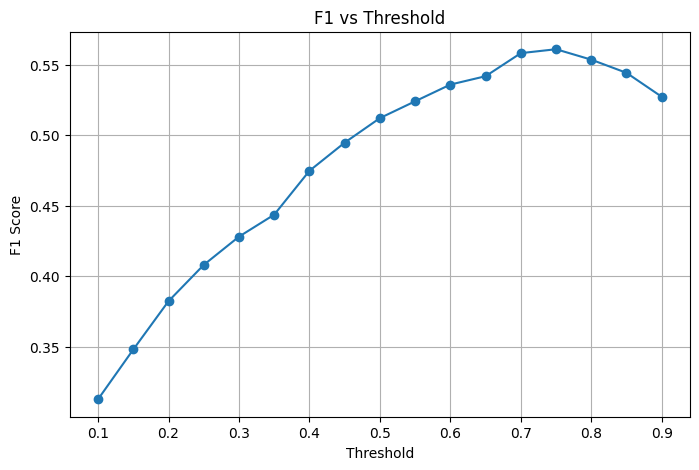

In [ ]:
thresholds = np.arange(0.1, 0.91, 0.05)  # 0.1 → 0.9 in steps of 0.05
f1_scores = []

best_idx = -1
best_f1_score = -1
for i in range(len(thresholds)):
    y_pred = (y_prob > thresholds[i]).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1_score:
      best_f1_score = f1
      best_idx = i
    f1_scores.append(f1)

# Find best threshold
best_idx = np.argmax(f1_scores)
print(f"Best threshold: {thresholds[best_idx]:.2f}  F1: {f1_scores[best_idx]:.3f}")

# Plot
plt.figure(figsize=(8,5))
plt.plot(thresholds, f1_scores, marker="o")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 vs Threshold")
plt.grid(True)
plt.show()

In [ ]:
best_threshold = thresholds[best_idx]

print(f"Best threshold: {best_threshold:.2f}, best F1 = {best_f1_score:.3f}")


Best threshold: 0.75, best F1 = 0.561


In [ ]:
y_pred_final = (y_prob > best_threshold).astype(int)